In [1]:
import collada as co
from shapely.geometry import Polygon
import geopandas as gpd
import pathlib

In [3]:
def dae2poly(model_path):
    model_path = str(model_path)
    mesh = co.Collada(model_path)
    # make polygonlist
    polys = []
    for geom in mesh.geometries:
        for triset in geom.primitives:
            for tri in triset:
                poly = Polygon(tri.vertices)
                polys.append(poly)
                
    gdf = gpd.GeoDataFrame(geometry=polys)
    gdf['id'] = 1
    gdf = gdf.dissolve('id')
    assert len(gdf), 'expect exactly one poy'
    #gdf = gdf.buffer(0.1)
    return gdf.geometry[1]

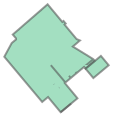

In [4]:
dae2poly('model_635.dae')

In [5]:
modpath = pathlib.Path(r'C:\test\Sample_swissBUILDINGS3D2.0_LV95\KML\Sample_swissBUILDINGS3D20_WGS84_1166-42\models')
assert modpath.is_dir()
modpaths = list(modpath.glob('*.dae'))
len(modpaths)

1503

In [8]:
%%time
i = 0
for i, modpath in enumerate(modpaths):
    if i % 100 == 0:
        print(i, end=' ')
    dae2poly(modpath)

0 100 200 300 400 500 600 700 800 900 

C:\tools\anaconda3\lib\site-packages\collada\util.py:70: RuntimeWarning: invalid value encountered in true_divide
  return vec / numpy.sqrt(numpy.vdot(vec, vec))


1000 1100 1200 1300 1400 1500 Wall time: 28.1 s


1500 buildings: 30s  
3000 / min  
180_000 / h  
4_320_000 / day  